<a href="https://colab.research.google.com/github/lgerardino/Inventory-analysis-and-Optimization/blob/main/notebook4476dc0b40.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
anirudhchauhan_retail_store_inventory_forecasting_dataset_path = kagglehub.dataset_download('anirudhchauhan/retail-store-inventory-forecasting-dataset')

print('Data source import complete.')


Data source import complete.


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Read dataset as csv

In [4]:
df = pd.read_csv('/content/sample_data/retail_store_inventory.csv')

In [5]:
df

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73095,2024-01-01,S005,P0016,Furniture,East,96,8,127,18.46,73.73,20,Snowy,0,72.45,Winter
73096,2024-01-01,S005,P0017,Toys,North,313,51,101,48.43,82.57,10,Cloudy,0,83.78,Autumn
73097,2024-01-01,S005,P0018,Clothing,West,278,36,151,39.65,11.11,10,Rainy,0,10.91,Winter
73098,2024-01-01,S005,P0019,Toys,East,374,264,21,270.52,53.14,20,Rainy,0,55.80,Spring


from matplotlib import pyplot as plt
df['Inventory Level'].plot(kind='hist', bins=20, title='Inventory Level')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Units Sold'].plot(kind='hist', bins=20, title='Units Sold')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Units Ordered'].plot(kind='hist', bins=20, title='Units Ordered')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Demand Forecast'].plot(kind='hist', bins=20, title='Demand Forecast')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Store ID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Weather Condition').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Inventory Level', y='Units Sold', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Units Sold', y='Units Ordered', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Units Ordered', y='Demand Forecast', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Demand Forecast', y='Price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Inventory Level']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Store ID')):
  _plot_series(series, series_name, i)
  fig.legend(title='Store ID', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Inventory Level')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Inventory Level']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Category')):
  _plot_series(series, series_name, i)
  fig.legend(title='Category', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Inventory Level')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Inventory Level']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Region')):
  _plot_series(series, series_name, i)
  fig.legend(title='Region', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Inventory Level')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Inventory Level']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Weather Condition')):
  _plot_series(series, series_name, i)
  fig.legend(title='Weather Condition', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Inventory Level')

from matplotlib import pyplot as plt
df['Inventory Level'].plot(kind='line', figsize=(8, 4), title='Inventory Level')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Units Sold'].plot(kind='line', figsize=(8, 4), title='Units Sold')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Units Ordered'].plot(kind='line', figsize=(8, 4), title='Units Ordered')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Demand Forecast'].plot(kind='line', figsize=(8, 4), title='Demand Forecast')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Category'].value_counts()
    for x_label, grp in df.groupby('Store ID')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Store ID')
_ = plt.ylabel('Category')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Region'].value_counts()
    for x_label, grp in df.groupby('Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Category')
_ = plt.ylabel('Region')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Weather Condition'].value_counts()
    for x_label, grp in df.groupby('Region')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Region')
_ = plt.ylabel('Weather Condition')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Seasonality'].value_counts()
    for x_label, grp in df.groupby('Weather Condition')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Weather Condition')
_ = plt.ylabel('Seasonality')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Store ID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Inventory Level', y='Store ID', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Inventory Level', y='Category', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Region'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Inventory Level', y='Region', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Weather Condition'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Inventory Level', y='Weather Condition', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# EDA Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

df.isna().sum()

In [7]:
df.isna().sum()

,0
Date,0
Store ID,0
Product ID,0
Category,0
Region,0
Inventory Level,0
Units Sold,0
Units Ordered,0
Demand Forecast,0
Price,0


In [8]:
df.duplicated(). sum()

0

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [ ]:
des

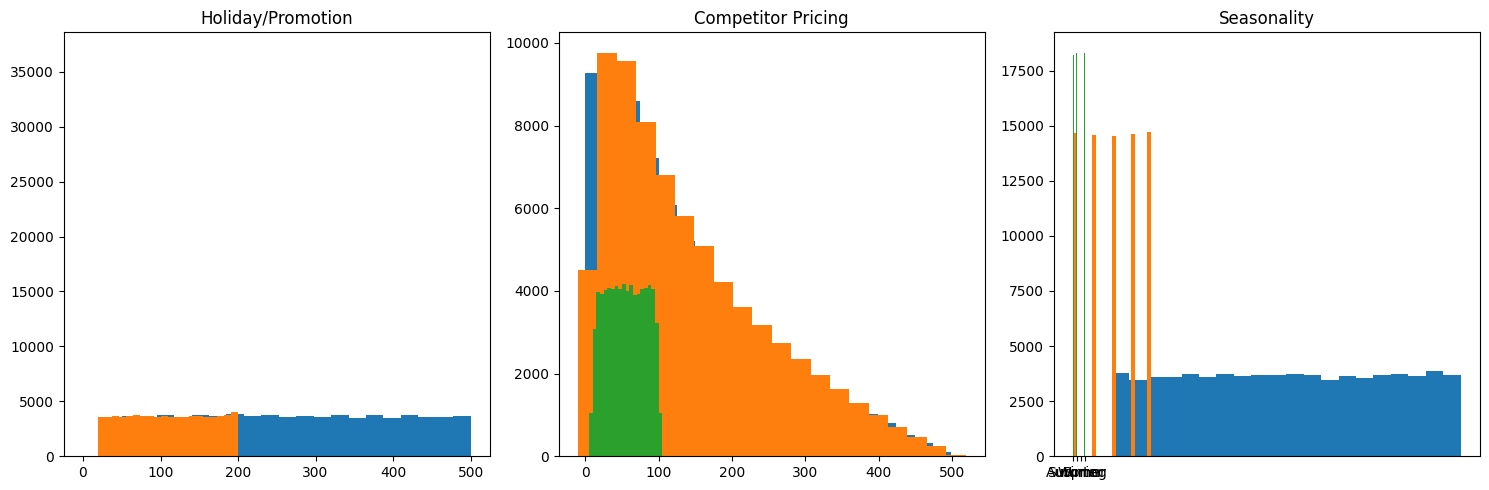

In [24]:
#plot histogram for inventory level, units sold, price, units ordered, demand forecast, discount, holiday promotion, competitor pricing, seasonality
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['Inventory Level'], bins=20)
plt.title('Inventory Level')

plt.subplot(1, 3, 2)
plt.hist(df['Units Sold'], bins=20)
plt.title('Units Sold')

plt.subplot(1, 3, 3)
plt.hist(df['Price'], bins=20)
plt.title('Price')

plt.subplot(1,3,1)
plt.hist(df['Units Ordered'], bins=20)
plt.title('Units Ordered')

plt.subplot(1,3,2)
plt.hist(df['Demand Forecast'], bins=20)
plt.title('Demand Forecast')

plt.subplot(1,3,3)
plt.hist(df['Discount'], bins=20)
plt.title('Discount')

plt.subplot(1,3,1)
plt.hist(df['Holiday/Promotion'], bins=20)
plt.title('Holiday/Promotion')

plt.subplot(1,3,2)
plt.hist(df['Competitor Pricing'], bins=20)
plt.title('Competitor Pricing')

plt.subplot(1,3,3)
plt.hist(df['Seasonality'], bins=20)
plt.title('Seasonality')


plt.tight_layout()
plt.show()


# Plot outliers

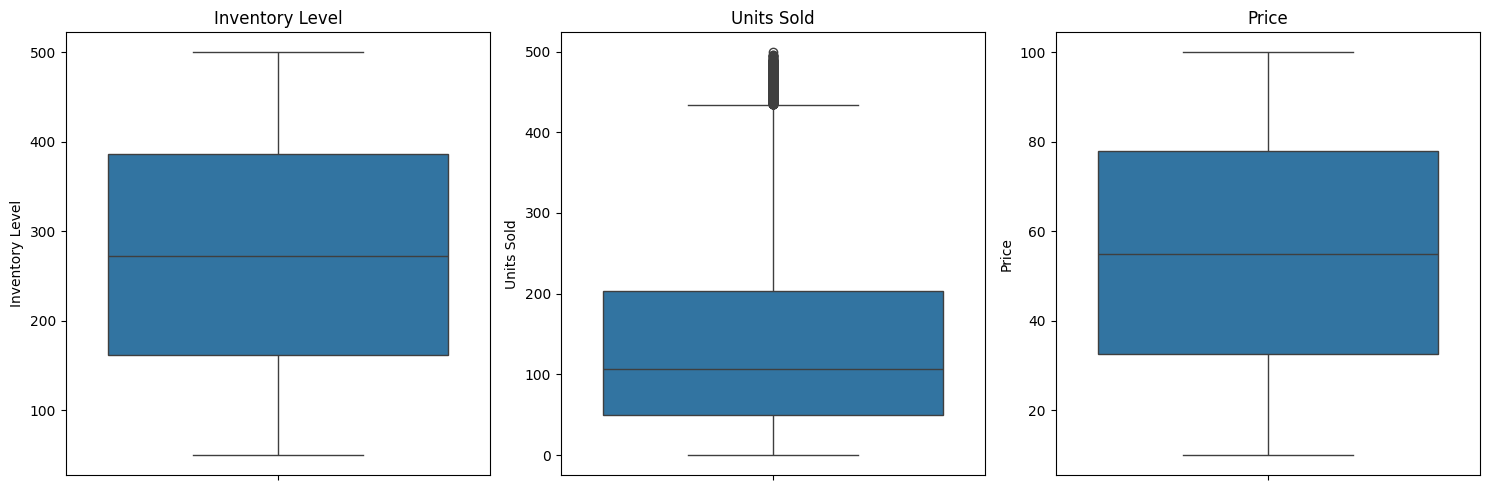

In [20]:
# prompt: create a blox plot to show outliers inventory level, units sold, price
import matplotlib.pyplot as plt
import seaborn as sns
# Create the box plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df['Inventory Level'])
plt.title('Inventory Level')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['Units Sold'])
plt.title('Units Sold')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['Price'])
plt.title('Price')

plt.tight_layout()
plt.show()


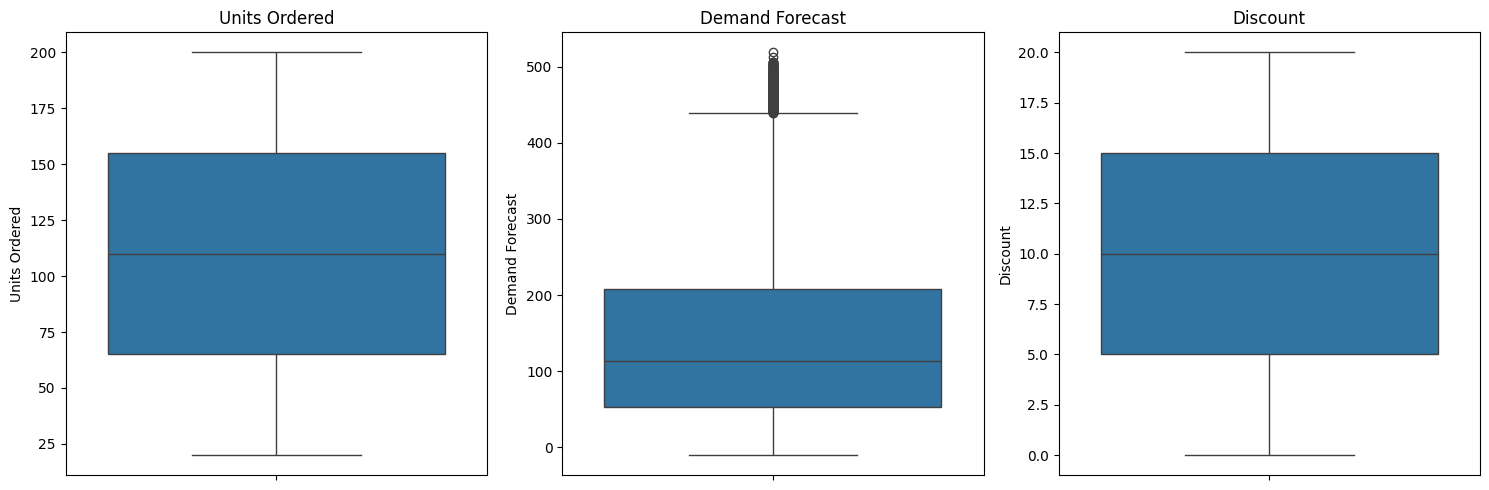

In [29]:
#create a boxplot to show outliers Unids Ordered, Demand forecast, Discount, Holiday Promotion, Competitor Pricing, Seasonality
import matplotlib.pyplot as plt
import seaborn as sns
# Create the box plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df['Units Ordered'])
plt.title('Units Ordered')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['Demand Forecast'])
plt.title('Demand Forecast')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['Discount'])
plt.title('Discount')


plt.tight_layout()
plt.show()






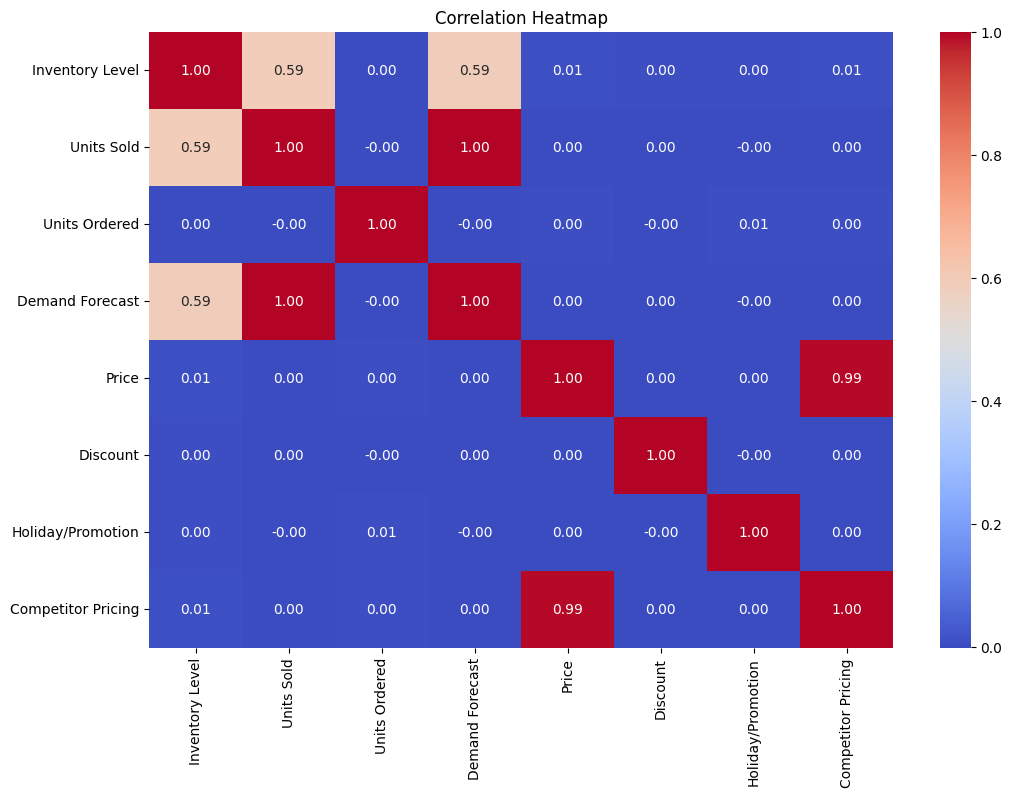

In [30]:
# Select numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()